In [37]:

#Import modules
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,  RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, validation_curve


In [85]:
with open('loan_data', 'rb') as file:
    loans = pickle.load(file, encoding="latin1")

In [101]:
loans.columns

Index(['amount', 'duration', 'payments', 'pop', 'urban_rat', 'avg_sal',
       'rat_urban', 'card', 'target', 'gender', 'appl_age', 'accnt_age',
       'freq_trans', 'freq_weekly', 'unempl', 'crime', 'multi', 'amount_trans',
       'balance', 'bank', 'account', 'type_trans_PRIJEM', 'type_trans_VYBER',
       'type_trans_VYDAJ', 'operation_PREVOD NA UCET',
       'operation_PREVOD Z UCTU', 'operation_VKLAD', 'operation_VYBER',
       'operation_VYBER KARTOU', 'k_symbol_ ', 'k_symbol_POJISTNE',
       'k_symbol_SANKC. UROK', 'k_symbol_SIPO', 'k_symbol_SLUZBY',
       'k_symbol_UROK'],
      dtype='object')

In [103]:
loans.iloc[:,:22]

,amount,duration,payments,pop,urban_rat,avg_sal,rat_urban,card,target,gender,...,freq_trans,freq_weekly,unempl,crime,multi,amount_trans,balance,bank,account,type_trans_PRIJEM
loan_id,,,,,,,,,,,,,,,,,,,,,
4959.0,80952.0,24.0,3373.0,1204953.0,100.0,12541.0,0.013859,0.0,0.0,0.5,...,0.0,0.0,0.29,0.071104,1,5934.069565,28168.265217,0.739130,0.608696,0.304348
4961.0,30276.0,12.0,2523.0,103347.0,67.0,9104.0,0.119017,0.0,1.0,1.0,...,0.0,0.0,1.51,0.022245,0,5196.061905,15123.228571,0.857143,0.571429,0.571429
4962.0,30276.0,12.0,2523.0,228848.0,57.2,9893.0,0.041949,0.0,0.0,0.0,...,0.0,0.0,4.72,0.025724,0,10877.390909,65905.293939,0.696970,0.606061,0.333333
4967.0,318480.0,60.0,5308.0,70646.0,58.4,8547.0,0.169861,0.0,1.0,0.0,...,0.0,0.0,3.64,0.021827,0,6099.478125,19646.928125,0.625000,0.500000,0.187500
4968.0,110736.0,48.0,2307.0,51428.0,52.7,8402.0,0.233336,0.0,0.0,1.0,...,0.0,1.0,3.98,0.021370,0,3195.586667,26548.976667,0.566667,0.433333,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294.0,39168.0,24.0,1632.0,94725.0,63.4,9920.0,0.137239,0.0,0.0,1.0,...,0.0,0.0,2.87,0.051159,0,6663.380952,58885.804762,0.857143,0.714286,0.285714
7295.0,280440.0,60.0,4674.0,387570.0,100.0,9897.0,0.036123,0.0,0.0,1.0,...,0.0,0.0,1.96,0.048239,0,7112.720000,46005.930000,1.000000,0.900000,0.350000
7304.0,419880.0,60.0,6998.0,1204953.0,100.0,12541.0,0.013859,0.0,0.0,0.5,...,0.0,1.0,0.29,0.071104,1,24466.730769,63273.615385,0.692308,0.615385,0.538462


In [110]:

#scale
X = loans.iloc[:,12:22].drop(['unempl','crime'], axis=1)
y = loans.target
kf = KFold(n_splits=4, shuffle=True)
kf.get_n_splits(X)
kfold = StratifiedKFold(n_splits=10)

number of element in train sample =  [183 255 326 398 469 541 613]


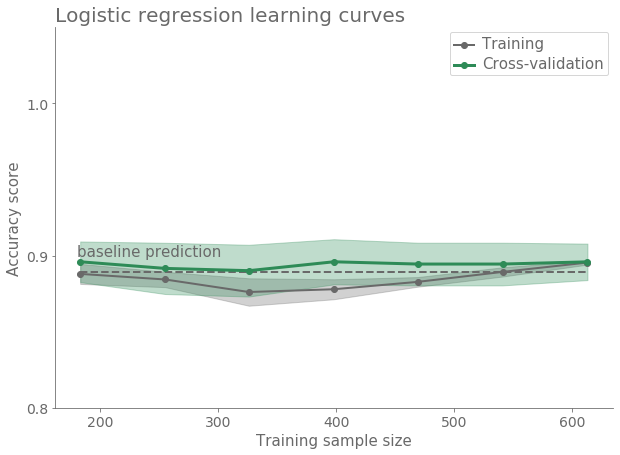

In [111]:
logc = LogisticRegression()
g = plot_learning_curve(logc,"Logistic regression learning curves",X, y ,cv=kfold,
                        train_sizes=np.linspace(.3, 1.0, 7),color2="dimgrey",color1="seagreen",plotmedian=False,
                          includebasetext=True )

number of element in train sample =  [ 61 199 337 475 613]


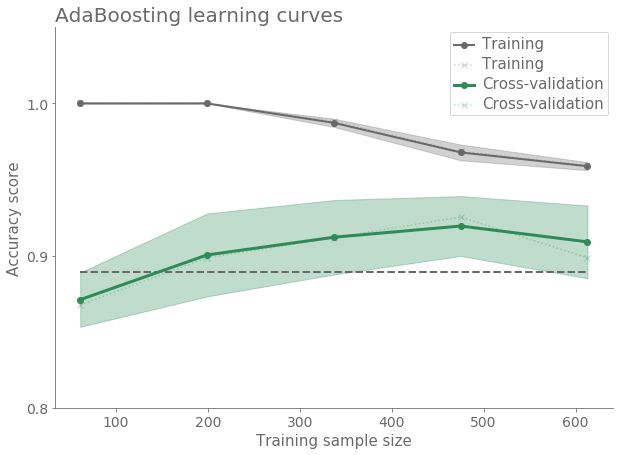

In [78]:
adc = AdaBoostClassifier(**{'n_estimators': 300, 'learning_rate': 0.1, 'algorithm': 'SAMME.R'})
g = plot_learning_curve(adc,"AdaBoosting learning curves",X,y,
                           cv=kfold,color2="dimgrey",color1="seagreen")

number of element in train sample =  [183 291 398 505 613]


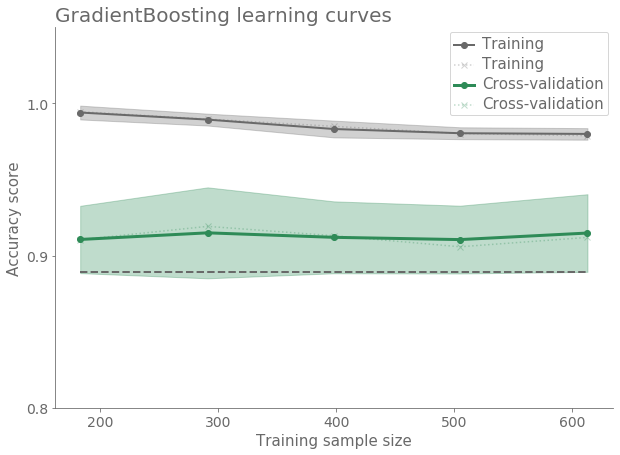

In [70]:
gbc = GradientBoostingClassifier(**{'loss': 'deviance', 'learning_rate': 0.02, 'min_samples_leaf': 20,
                            'n_estimators': 200, 'max_features': 7, 'max_depth': 5})
g = plot_learning_curve(gbc,"GradientBoosting learning curves",X,y,cv=kfold,
                           color2="dimgrey",color1="seagreen",
                        train_sizes=np.linspace(.3, 1.0, 5))

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5),color1 = "g",color2 = "r",
                        plotmedian=True, includebasetext=False, baselinepos=[180,0.9]):
    """Generate a simple plot of the test and training learning curve"""
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    plt.title(title, color="dimgray", loc="left", size=20)
    plt.xlabel("Training sample size", color="dimgrey",size=15)
    plt.ylabel("Accuracy score", color="dimgrey",size=15)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    print ("number of element in train sample = ", train_sizes)

    
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_median = np.median(train_scores, axis=1)

    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    if plotmedian:
        test_scores_median = np.median(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.grid()
    plt.plot(train_sizes[:], np.zeros(len(train_sizes))+0.889, ls="--", color = "dimgrey", lw=2)
    if includebasetext:
        plt.text(baselinepos[0], baselinepos[1], "baseline prediction",color="dimgrey",size=15)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color=color2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.3, color=color1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=color2, lw=2,
             label="Training")
    if plotmedian:
        plt.plot(train_sizes, train_scores_median, 'x:', color=color2,alpha=0.3,
             label="Training")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=color1,
             label="Cross-validation", lw=3)
    if plotmedian:
        plt.plot(train_sizes, test_scores_median, 'x:', color=color1, alpha=0.3,
             label="Cross-validation")
    plt.ylim([0.8,1.05])

    legend=plt.legend(loc="best")
    plt.setp(legend.get_texts(), color='dimgray', size=15)

    ax.spines['bottom'].set_color('dimgray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('dimgray')
    ax.tick_params(axis='x', colors='dimgray')
    ax.tick_params(axis='y', colors='dimgray', size=3)
    ax.get_yaxis().set_ticks([0.8,0.9,1.0])

    ax.tick_params(labelsize=14)

    return plt